In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
library(flowCore)

In [3]:
path <- "../data/AMJ_5L_Costim.fcs"
f <- read.FCS(path, transformation=TRUE)
comp <- spillover(f)[[1]]
fc <- compensate(f, comp)
lgcl <- estimateLogicle(fc, channels = c(
    'Blue B-A',
    'Blue A-A',
    'Violet H-A',
    'Violet G-A',
    'Red C-A',
    'Red B-A',
    'Red A-A',
    'Green E-A',
    'Green D-A',
    'Green C-A',
    'Green A-A'
    ))
ft <- transform(fc, lgcl)
sf <- sampleFilter(filterId="mySampleFilter", size=10000) 
x <- Subset(ft, filter(ft, sf))
summary(x) 

FSC-A     FSC-H     FSC-W     SSC-A     SSC-H     SSC-W     Blue B-A  
Min.      9812.72  10016.00  60952.94   1584.18   1583.00  62354.84 -0.4668016
1st Qu.  85318.50  68296.25  75292.19  32320.96  28698.75  72123.96  0.6854469
Median  105943.98  87754.50  78349.85  45592.56  39300.00  73545.18  0.9817100
Mean    115572.74  92895.98  81437.97  73178.35  58395.09  79003.19  1.2184977
3rd Qu. 132862.72 111220.50  82901.69  75199.12  60075.50  77870.66  1.3343766
Max.    262143.00 262037.00 194348.27 262143.00 256031.00 262143.00  4.0873346
        Blue A-A   Violet H-A Violet G-A Red C-A    Red B-A    Red A-A   
Min.    -0.6004097 -0.1523588 -0.2231844 -0.6433005 -0.3605275 -0.4234843
1st Qu.  0.9195556  0.5263324  1.4706650  0.7193447  0.5941903  0.6886921
Median   1.0608756  0.7642030  2.1699683  1.0603815  0.7563623  0.9791916
Mean     1.4429119  0.9559006  1.9374378  1.2940307  0.8018667  1.2949343
3rd Qu.  2.2161838  1.4232962  2.4074721  1.9320602  0.9711053  1.8677639
Max.     3.6704920  3.2961146  3.9806888  3.6055510  3.3766426  4.4681869
        Green E-A  Green D-A  Green C-A  Green A-A  Time     
Min.    -1.5882744 -0.1962997 -0.3349112 -0.4137245    19.200
1st Qu.  0.6434431  0.9038586  0.9401516  0.7186946  8450.775
Median   0.8628171  1.8033376  1.2962100  0.9691524 16791.000
Mean     0.8934425  1.7693686  1.4507883  0.9770061 17048.641
3rd Qu.  1.1156064  2.6622883  1.8088346  1.2151880 25272.676
Max.     2.7884887  3.9794782  4.1122365  4.1046568 35850.898

In [4]:
library(ggcyto)

Loading required package: ncdfFlow

Loading required package: RcppArmadillo

Loading required package: BH

Loading required package: flowWorkspace



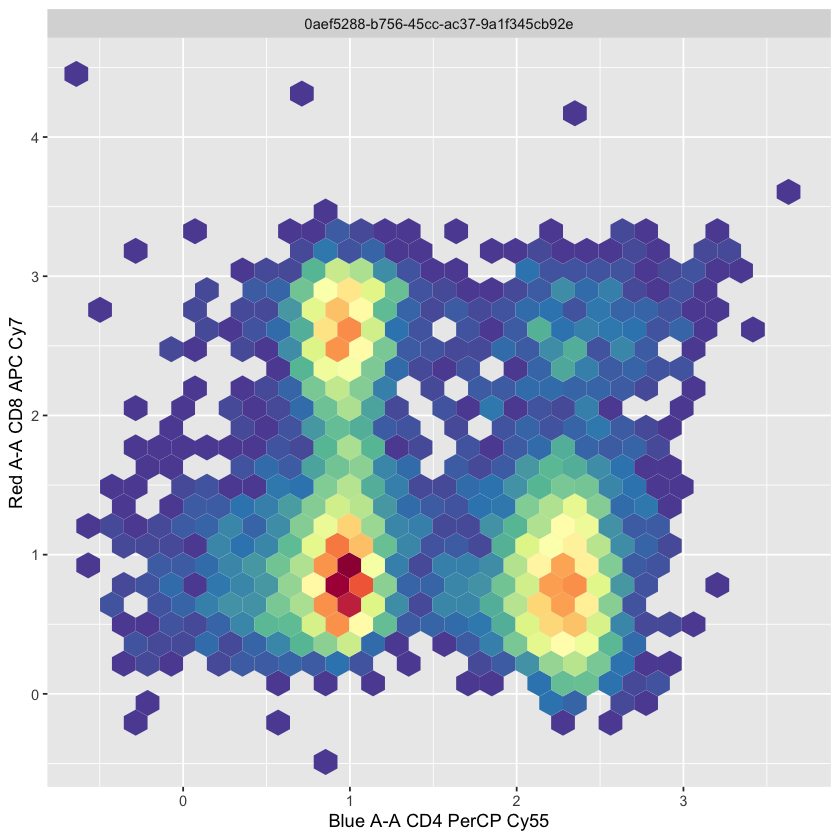

In [5]:
autoplot(x, "Blue A-A", "Red A-A")

### Clustering

In [6]:
library(flowClust)


Attaching package: ‘flowClust’


The following object is masked from ‘package:graphics’:

    box


The following object is masked from ‘package:base’:

    Map




In [7]:
res <- flowClust(
    x,
    varNames = c("Blue A-A", "Red A-A"),
    K = 1:6,
    B = 10
)

In [8]:
summary(res[[3]])

** Experiment Information ** 
Experiment name: Flow Experiment 
Variables used: Blue A-A Red A-A 
** Clustering Summary ** 
Number of clusters: 3 
Proportions: 0.213092 0.4049442 0.3819638 
** Transformation Parameter ** 
lambda: 0.7316903 
** Information Criteria ** 
Log likelihood: -13556.76 
BIC: -27279.32 
ICL: -28560.62 
** Data Quality ** 
Number of points filtered from above: 0 (0%)
Number of points filtered from below: 0 (0%)
Rule of identifying outliers: 90% quantile
Number of outliers: 1156 (11.56%)
Uncertainty summary: 


In [9]:
res

Object of class 'flowClustList' 
This object consists of a list of 'flowClust' elements, each of which has the following slots:
expName, varNames, K, w, mu, sigma, lambda, nu, z, u, label, uncertainty, ruleOutliers, flagOutliers, rm.min, rm.max, logLike, BIC, ICL, prior

Rule of identifying outliers: 90% quantile


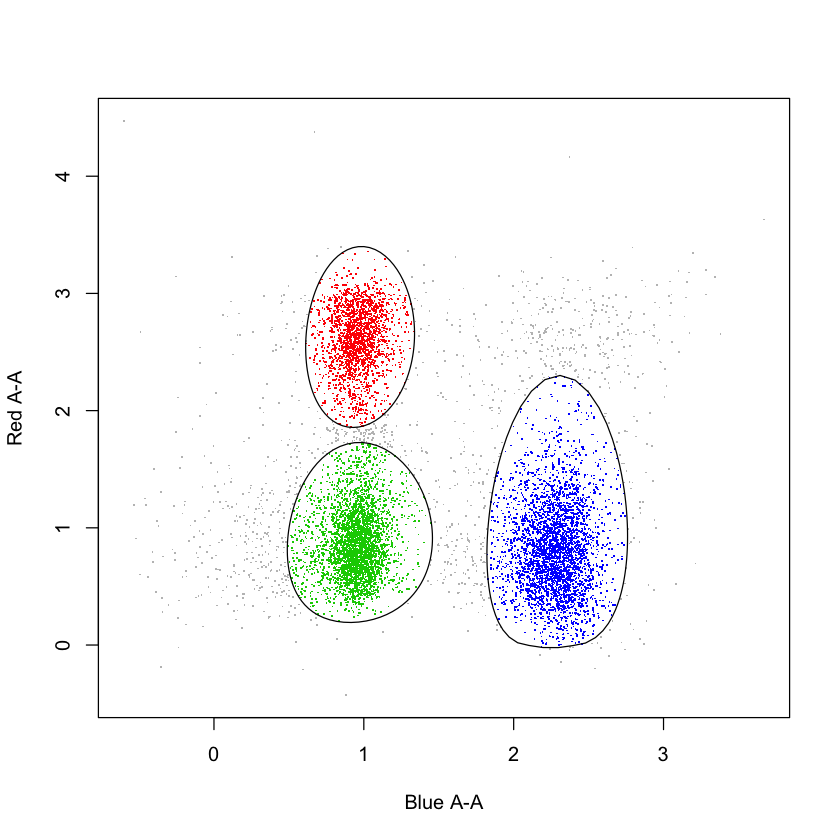

In [10]:
plot(
    res[[3]],
    data= x,
    level = 0.9
)